# Subplots

What I want it to display multiple plots, with a given max rows. And to display my plots depending only on these parameters.

In [1]:
from fastai.tabular.all import *

%matplotlib inline

# fastai v1 backward compatibility
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np

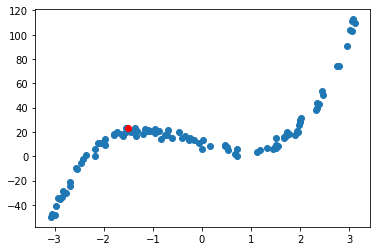

In [3]:
def my_hidden_f(x):
    return 4*x**3+2*x**2-12*x+5+10*torch.rand(x.shape)

n=100
time = torch.ones(n,1) 
time[:,0].uniform_(-3.14,3.14)

speed=my_hidden_f(time)


plt.scatter(time[:,0], speed)
plt.scatter(tensor(-1.5), my_hidden_f(tensor([-1.5])), color='red')

def f(t, params):
    a,b,c,d = params
    return a*(t**3) + (b*t**2) + c*t + d

def mse(preds, targets): return ((preds-targets)**2).mean()

def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-50,150)

lr = 1e-4

def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

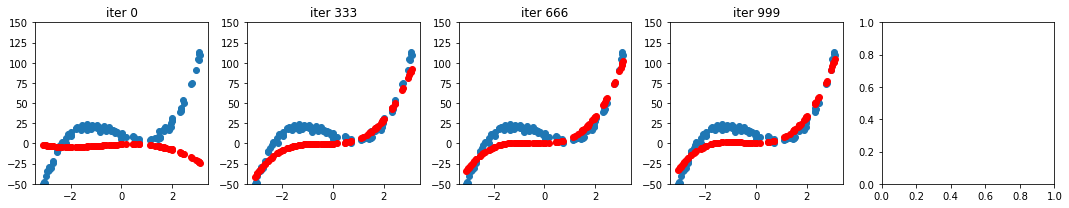

In [4]:
#load initial parameters
params = torch.randn(4).requires_grad_()
#nbr of iterations
max_iter = 1000
#nbr of curves visible
nbr_graph = 4
#max number of curves on one row
max_columns = 5
#nbr of rows
max_rows = (nbr_graph-1) // max_columns + 1
#nbr of iter per plot
graph_iteration = max_iter //(nbr_graph-1)

_,axs = plt.subplots(nrows=max_rows,ncols=max_columns,figsize=(3*max_columns,3*max_rows))

i=-1
ax_index= ((i+1) // graph_iteration ) // (max_columns),  ((i+1) // graph_iteration ) % (max_columns)
if (max_rows ==1): ax_index= ((i+1) // graph_iteration ) % (max_columns)

show_preds(apply_step(params, prn=False), axs[ax_index])
axs[ax_index].set_title('iter 0')

for i in range(max_iter): 
    preds=apply_step(params, prn=False)
    if ((i+1) % graph_iteration == 0):         
        ax_index= ((i+1) // graph_iteration ) // (max_columns),  ((i+1) // graph_iteration ) % (max_columns)
        if (max_rows ==1): ax_index= ((i+1) // graph_iteration ) % (max_columns)
        show_preds(preds, axs[ax_index])
        axs[ax_index].set_title('iter '+str(i+1))
plt.tight_layout()

# Animation

import

In [11]:
%matplotlib inline

# fastai v1 backward compatibility
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np

def tensor(*argv): return torch.tensor(argv)

# TEST
assert torch.all(tensor(1,2) == torch.tensor([1,2])), 'Backward compatibility with fastai v1'

function and plot

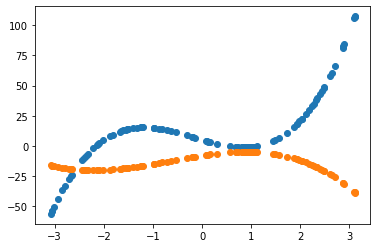

In [12]:
n=100
x = torch.ones(n,1) 
x.uniform_(-3.14,3.14)

def my_function(x, a):
    return ((torch.cat((x**3, x**2, x, torch.ones(n,1) ), 1))@a).reshape((n))

a=tensor(4., 2., -12., 5.)
y = my_function(x, a)

a = tensor(-1.,-2., 6., -8)
y_hat = my_function(x, a)


plt.scatter(x[:,0], y)
plt.scatter(x[:,0],y_hat);

def mse(y_hat, y): return ((y_hat-y)**2).mean()

gradient descent

In [13]:
a = nn.Parameter(a); a

def update():
    y_hat = my_function(x, a)
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

        
lr = 1e-3
for t in range(100): update()

tensor(1967.0251, grad_fn=<MeanBackward0>)
tensor(559.2718, grad_fn=<MeanBackward0>)
tensor(365.7207, grad_fn=<MeanBackward0>)
tensor(282.6393, grad_fn=<MeanBackward0>)
tensor(245.4054, grad_fn=<MeanBackward0>)
tensor(227.3450, grad_fn=<MeanBackward0>)
tensor(217.3324, grad_fn=<MeanBackward0>)
tensor(210.7267, grad_fn=<MeanBackward0>)
tensor(205.5912, grad_fn=<MeanBackward0>)
tensor(201.1171, grad_fn=<MeanBackward0>)


animation

In [16]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

a = nn.Parameter(tensor(-1.,1))

a=tensor(4., 2., -12., 5.)
y = my_function(x, a)

a = tensor(-1.,-2., 6., -8)
y_hat = my_function(x, a)
a = nn.Parameter(a); a

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line = plt.scatter(x[:,0], y_hat.detach())
plt.close()

def animate(i):
    line.set_offsets(np.c_[x[:,0], (my_function(x,a)).detach()])
    update()

    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 300), interval=5)